# Modelo a partir de árboles de decisión -CART-

Determinar si un paciente al cual se le realizan diferentes estudios de laboratorio y clínicos, para hallar enfermedades como: Hipertensión, Hiperglucemia, Colesterol HDL bajo, Hipertriglidicemia, Trastorno de cintura - alta y poliúrea. Además, se tienen en cuenta datos como: La edad, el género, si fuma y si consume licor.

Objetivo: Diagnosticar si la persona posee un síndrome metabólico asociado a enfermedad cardiovascular.

Variables predictorias: Son las mencionadas en el enunciado.

Variable a predecir: Enfermedad SMEC

## Cargamos los datos

In [ ]:
import pandas as pd

In [ ]:
#Leemos los datos
ruta = '/content/drive/MyDrive/CART_MODEL/Datos_Pacientes.csv'
df_pacientes = pd.read_csv(ruta, index_col=0)

In [ ]:
#mostramos
df_pacientes

,Enfermedad,Hipertensión,Hiperglucemia,HDL Bajo,Hipertri/demia,ICA,Edad,Género,Tabaco,Alcohol,Poliúrea
Expediente,,,,,,,,,,,
1,NO,0,0,1,0,0,38,0,0,0,0
2,SI,0,1,1,1,1,49,1,0,0,0
3,SI,1,1,0,1,1,59,1,0,0,1
4,NO,1,1,0,0,0,44,0,0,0,0
5,NO,0,0,1,0,0,42,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
890,SI,1,1,1,0,0,70,1,0,0,0
892,NO,0,0,0,0,0,39,0,0,0,0
904,NO,1,0,1,1,0,45,0,0,1,0


In [ ]:
df_pacientes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 985 entries, 1 to 909
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Enfermedad      985 non-null    object
 1   Hipertensión    985 non-null    int64 
 2   Hiperglucemia   985 non-null    int64 
 3   HDL Bajo        985 non-null    int64 
 4   Hipertri/demia  985 non-null    int64 
 5   ICA             985 non-null    int64 
 6   Edad            985 non-null    int64 
 7   Género          985 non-null    int64 
 8   Tabaco          985 non-null    int64 
 9   Alcohol         985 non-null    int64 
 10  Poliúrea        985 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 92.3+ KB


## Separar las variables predictoras, de la variable a predecir

In [ ]:
#Variable a predecir
Y = df_pacientes.iloc[:,0]

#Variables predictoras
X = df_pacientes.iloc[:,1:11]  #[:,] son todas las filas y [,1:11] son las columnas de la 1 a la 10

In [ ]:
#mostremos
X.head()

,Hipertensión,Hiperglucemia,HDL Bajo,Hipertri/demia,ICA,Edad,Género,Tabaco,Alcohol,Poliúrea
Expediente,,,,,,,,,,
1,0,0,1,0,0,38,0,0,0,0
2,0,1,1,1,1,49,1,0,0,0
3,1,1,0,1,1,59,1,0,0,1
4,1,1,0,0,0,44,0,0,0,0
5,0,0,1,0,0,42,0,0,0,0


## Dividimos la información en dos partes: Lo que será el entrenamiento, y lo que será la prueba o testeo

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Variables de prueba - prueba
#Variables de entrenamiento - entrenar
X_entrenar, X_prueba, Y_entrenar, Y_prueba = train_test_split(X, Y, train_size=0.75, random_state=0) #Voy a entrenar con el 75% por eso el 0.75
#random_state=0 usa los mismos datos siempre, aunque no estén en orden

In [ ]:
#mostrar
X_entrenar.head()

,Hipertensión,Hiperglucemia,HDL Bajo,Hipertri/demia,ICA,Edad,Género,Tabaco,Alcohol,Poliúrea
Expediente,,,,,,,,,,
731,1,1,1,0,0,44,0,0,0,0
224,0,1,1,1,1,47,1,0,0,0
472,0,1,1,0,1,44,0,0,0,0
780,0,0,0,0,0,41,0,0,0,0
669,0,0,1,0,0,41,0,1,0,0


In [ ]:
#mostrar
Y_entrenar.head()

,Enfermedad
Expediente,
731,SI
224,SI
472,SI
780,NO
669,NO


In [ ]:
#mostremos
X_prueba.info()

<class 'pandas.core.frame.DataFrame'>
Index: 247 entries, 349 to 373
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Hipertensión    247 non-null    int64
 1   Hiperglucemia   247 non-null    int64
 2   HDL Bajo        247 non-null    int64
 3   Hipertri/demia  247 non-null    int64
 4   ICA             247 non-null    int64
 5   Edad            247 non-null    int64
 6   Género          247 non-null    int64
 7   Tabaco          247 non-null    int64
 8   Alcohol         247 non-null    int64
 9   Poliúrea        247 non-null    int64
dtypes: int64(10)
memory usage: 21.2 KB


In [ ]:
#mostramos
Y_prueba.head()

,Enfermedad
Expediente,
349,NO
821,NO
44,NO
939,SI
528,NO


## Creamos el árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Llamar la función
arbol_de_decision = DecisionTreeClassifier(max_depth=4)

#Si los paréntesis de la función están vaciós, toma todos los niveles del árbol
#Si quiero mostrar menos niveles, uso max_depth=<número de niveles>

In [ ]:
#Entrenamos el modelo
arbol_enfermedad = arbol_de_decision.fit(X_entrenar, Y_entrenar)
#(Variables predictoras, Variable a predecir)

## Grafiquemos el árbol

In [ ]:
from matplotlib import pyplot as plt   #para dimensionar las gráficas o figuras
from sklearn import tree     #para crear el gráfico del árbol

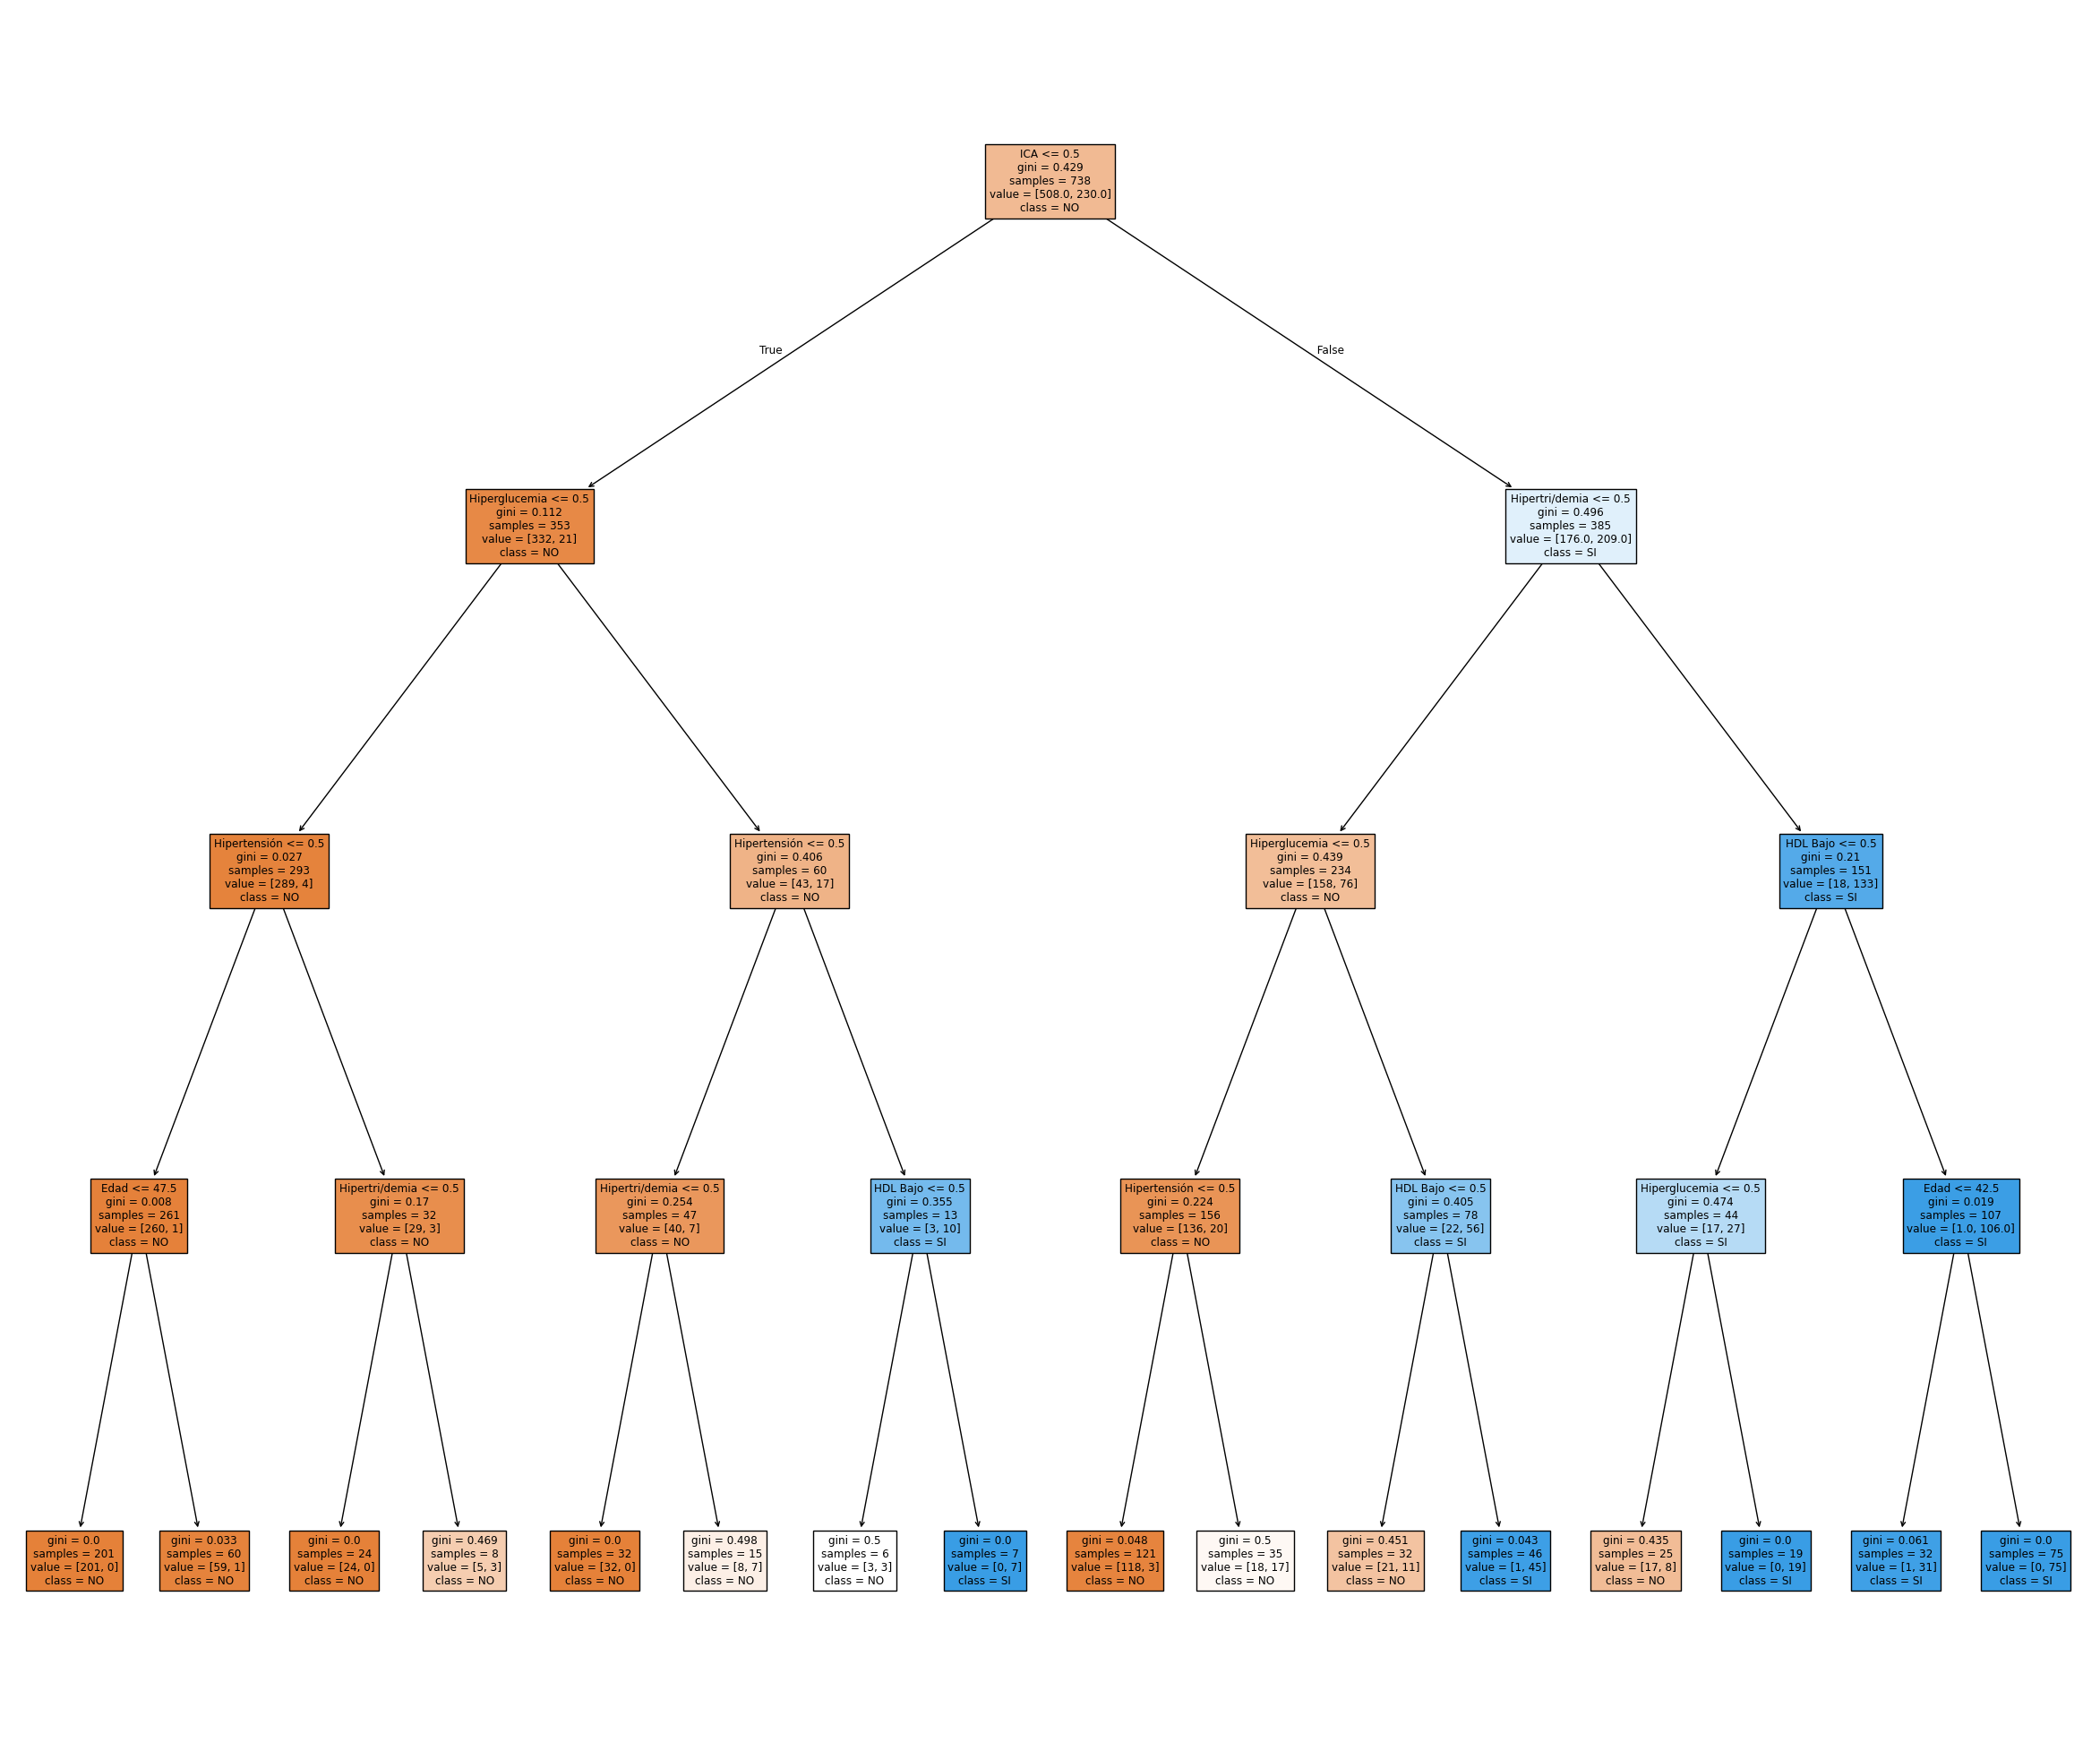

In [ ]:
#Indicamos las dimensiones del gráfico
figura = plt.figure(figsize=(30,25))  #figsize=(ancho,alto)

#creamos la gráfica del árbol
nombres_predictoras = list(X.columns.values)
nombre_predecir = list(Y.values)

#lanzamos la gráfica
tree.plot_tree(arbol_enfermedad, feature_names=nombres_predictoras, class_names=nombre_predecir, filled=True)

#mostramos el gráfico
plt.show()

In [ ]:
#Guardemos la figura
ruta_arbol = '/content/drive/MyDrive/CART_MODEL/'
nombre_figura = 'arbol_decision_enfermedad.png'
figura.savefig(ruta_arbol + nombre_figura)

## Mostramos la predicción

In [ ]:
#predecir la respuesta para los datos de la prueba
Y_prediccion = arbol_enfermedad.predict(X_prueba)
Y_prediccion

array(['SI', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'SI', 'NO', 'SI', 'SI', 'SI', 'NO', 'SI', 'SI', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'SI', 'NO', 'SI', 'NO', 'NO', 'SI', 'NO', 'NO',
       'SI', 'NO', 'SI', 'NO', 'NO', 'NO', 'SI', 'NO', 'SI', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'SI', 'NO', 'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'SI', 'SI', 'NO', 'SI',
       'NO', 'NO', 'NO', 'NO', 'SI', 'SI', 'NO', 'SI', 'NO', 'NO', 'SI',
       'NO', 'NO', 'SI', 'NO', 'NO', 'SI', 'SI', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'N

## Calculamos la precisión del modelo

### Creamos la matriz de confusión

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
matriz_de_cofusion = confusion_matrix(Y_prueba, Y_prediccion)
#confusion_matrix(Valores reales de las clases, Valores predichos)
matriz_de_cofusion

array([[178,   3],
       [ 12,  54]])

## Mostrar la precisión del proceso y de las clases

In [ ]:
import numpy as np

In [ ]:
precision_global = np.sum(matriz_de_cofusion.diagonal())/np.sum(matriz_de_cofusion)
precision_global

0.9392712550607287

In [ ]:
#Otra manera de hacer este cálculo
from sklearn.metrics import accuracy_score
accuracy_score(Y_prediccion, Y_prueba)

0.9392712550607287

In [ ]:
#Precisión de los NO enfermos
precision_NO_enfermos = matriz_de_cofusion[0,0]/np.sum(matriz_de_cofusion[0,])
precision_NO_enfermos

0.9834254143646409

In [ ]:
#Precisión de los SI enfermos
precision_SI_enfermos = matriz_de_cofusion[1,1]/np.sum(matriz_de_cofusion[1,])
precision_SI_enfermos

0.8181818181818182

# Guardar el modelo que diseñamos

## Creamos un archivo con permisos de lectura, con:

Usamos un archivo .sav que permite almacenar datos hipotéticos. Este archivo es un formato binario específico del CPLEX.

CPLEX: Lenguaje de programación C EXtended. Es un paquete de software que proporciona un conjunto de bibliotecas y herramientas para resolver problemas de optimización. (IBM)

In [ ]:
#creamos el archivo
archivo_del_modelo = open('/content/drive/MyDrive/CART_MODEL/modelo_enfermedad.sav', 'wb')



In [ ]:
from pickle import dump

In [ ]:
dump(arbol_enfermedad, archivo_del_modelo)

In [ ]:
archivo_del_modelo.close()

# Pacientes nuevos

Cargamos la información correspondiente a un grupo de pacientes nuevos, es decir, que no concocemos si están o no enfermos de SMEC, para obtener la predicción.

In [ ]:
#Leemos los nuevos pacientes
df_pacientes_nuevos = pd.read_csv('/content/drive/MyDrive/CART_MODEL/Datos_Pacientes_Nuevos.csv', index_col=0)
df_pacientes_nuevos

,Hipertensión,Hiperglucemia,HDL Bajo,Hipertri/demia,ICA,Edad,Género,Tabaco,Alcohol,Poliúrea
Expediente,,,,,,,,,,
1,1,1,1,0,1,49,0,1,0,0
2,0,0,0,0,1,21,0,0,0,0
3,0,0,1,1,1,30,1,0,1,0
4,0,0,0,0,1,35,0,1,1,0
5,0,1,0,0,0,48,1,0,0,1
6,1,0,1,0,0,26,1,1,0,1
7,1,0,0,1,0,32,0,0,0,0
8,0,0,0,0,0,27,1,1,0,0
9,0,1,1,1,0,56,0,1,0,0


## Cargamos el modelo

In [ ]:
from pickle import load

In [ ]:
modelo_cargado = load(open('/content/drive/MyDrive/CART_MODEL/modelo_enfermedad.sav','rb'))

# Aplicamos el modelo a los pacientes nuevos

In [ ]:
prediccion_pacientes_nuevos = modelo_cargado.predict(df_pacientes_nuevos)
prediccion_pacientes_nuevos

array(['SI', 'NO', 'SI', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO'],
      dtype=object)

# Creamos el DF para almacenar los resultados en la columna predicción

In [ ]:
columna = ['Prediccion']
df_prediccion = pd.DataFrame(prediccion_pacientes_nuevos,index=df_pacientes_nuevos.index.values, columns=columna)
df_prediccion

,Prediccion
1,SI
2,NO
3,SI
4,NO
5,NO
6,NO
7,NO
8,NO
9,NO
10,NO


# Unimos la predicción con el df nuevo original

In [ ]:
df_final = pd.concat([df_prediccion, df_pacientes_nuevos], axis=1)
df_final

,Prediccion,Hipertensión,Hiperglucemia,HDL Bajo,Hipertri/demia,ICA,Edad,Género,Tabaco,Alcohol,Poliúrea
1,SI,1,1,1,0,1,49,0,1,0,0
2,NO,0,0,0,0,1,21,0,0,0,0
3,SI,0,0,1,1,1,30,1,0,1,0
4,NO,0,0,0,0,1,35,0,1,1,0
5,NO,0,1,0,0,0,48,1,0,0,1
6,NO,1,0,1,0,0,26,1,1,0,1
7,NO,1,0,0,1,0,32,0,0,0,0
8,NO,0,0,0,0,0,27,1,1,0,0
9,NO,0,1,1,1,0,56,0,1,0,0
10,NO,0,0,0,0,1,22,1,1,1,0


In [ ]:
df_final_2 = pd.merge(df_prediccion, df_pacientes_nuevos, left_index=True, right_index=True, how='right')
df_final_2

,Prediccion,Hipertensión,Hiperglucemia,HDL Bajo,Hipertri/demia,ICA,Edad,Género,Tabaco,Alcohol,Poliúrea
Expediente,,,,,,,,,,,
1,SI,1,1,1,0,1,49,0,1,0,0
2,NO,0,0,0,0,1,21,0,0,0,0
3,SI,0,0,1,1,1,30,1,0,1,0
4,NO,0,0,0,0,1,35,0,1,1,0
5,NO,0,1,0,0,0,48,1,0,0,1
6,NO,1,0,1,0,0,26,1,1,0,1
7,NO,1,0,0,1,0,32,0,0,0,0
8,NO,0,0,0,0,0,27,1,1,0,0
9,NO,0,1,1,1,0,56,0,1,0,0


In [ ]:
#guardemos
df_final.to_csv('/content/drive/MyDrive/CART_MODEL/prediccion_pacientes_nuevos.csv')